# Tâche 7
- François Clinquart 
- NOMA : 59602100
- LMAPR1492 Physique des matéraiux 
DEADLINE : le lundi, 11 mars 2024 

## importation des modules nécessaires 

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
## IMPORTATION IMPORTANTE
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter

# Mon Matériaux - le ScSnAu
Il s'agit d'un Cristal cubique de groupe ponctuel : -43m

In [2]:
mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-2894" #ScSnAu

In [3]:
with MPRester(mp_key) as m:
    elec_struct = m.get_bandstructure_by_material_id(mp_id)
    

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# le Délivrable
pour analyser celle-ci à savoir:

- déterminer la bande interdite,

- trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches),

- calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.


### 1) Détermination de la bande interdite 


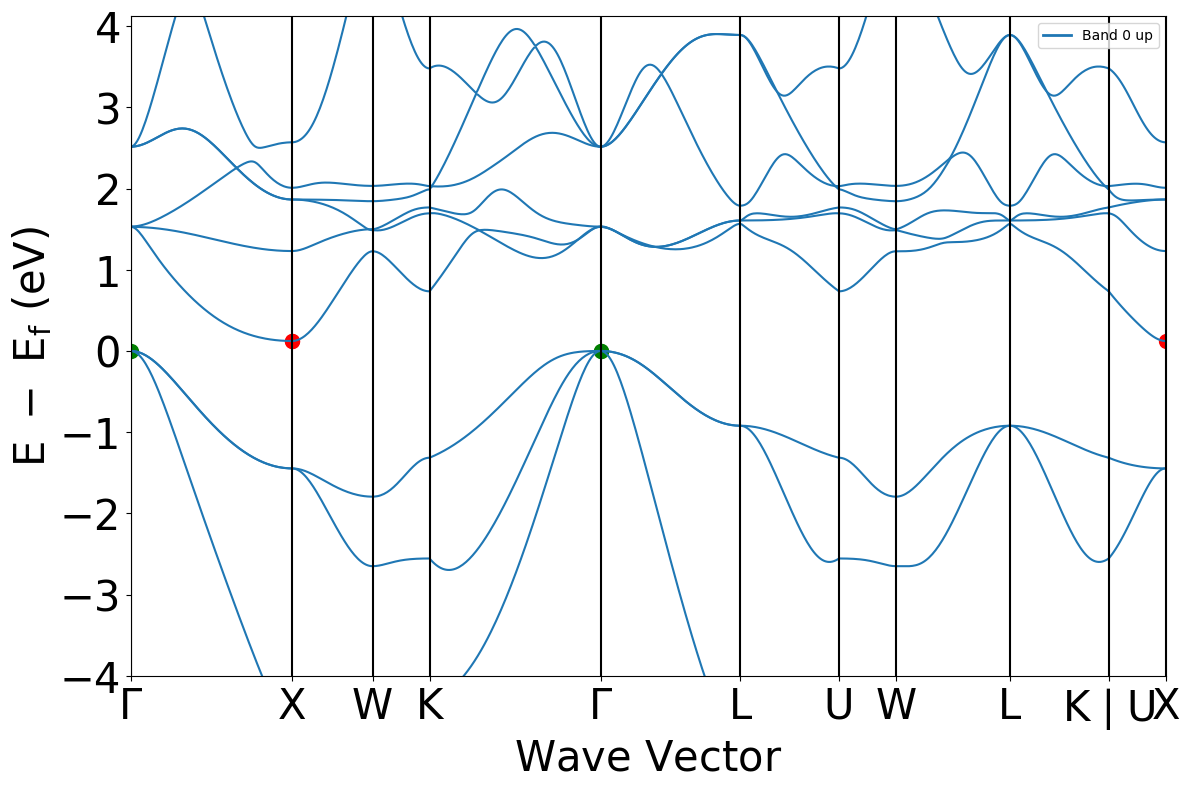

In [4]:
plot = BSPlotter(elec_struct)
plot.get_plot(vbm_cbm_marker=True)
data= plot.bs_plot_data()

In [5]:

band_gap = elec_struct.get_band_gap()

print("Épaisseur de la bande interdite : " + str(band_gap['energy']) + " eV")
print("Directe ? ", band_gap['direct'])
#on le voit sur le dessin que la bande n'est pas directe, le minima ne coÎncide pas avec le maximun 

#Diagramme Energie en fonction de k sur le Chemin sur la zone de Brilliouin. 



Épaisseur de la bande interdite : 0.12249999999999961 eV
Directe ?  False


- L'épaisseur de la bande interdite est de `0.12 [eV]`. Il s'agit de la distance sépérant le maximun de la bande de valence et le minimun de la bande conduction 

- La bande interdite n'est pas directe : Dans un matériau à bande indirecte, le minimum de la bande de conduction et le maximum de la bande de valence ne se trouvent pas au même vecteur d'onde. Pour qu'un électron passe de la bande de valence à la bande de conduction (ou l'inverse), il doit non seulement gagner ou perdre de l'énergie (sous forme de photon) mais aussi changer de vecteur d'onde, ce qui implique l'intervention d'un phonon (quantum de vibration du réseau cristallin) pour conserver la quantité de mouvement. Cette nécessité rend les transitions moins probables. **On est obligé de changer de k pour avoir le saut d'électrons de la bande de conduction à la bande de valence**


In [6]:

data = BSPlotter(elec_struct).bs_plot_data()
E_zero = data.get('zero_energy')
print("Le maximun de la bande de valence est [eV]:", E_zero)
print("Le minimun de la bande de conduction est [eV] :", E_zero + band_gap['energy'])
print("Le vecteur de transition dans la bande interdite : " + str(band_gap['transition']))

#un vecteur de transition désigne un vecteur dans l'espace réciproque qui connecte deux points particuliers de la zone de Brillouin
#zone de Brillouin : maille primitive dans le reseau reciproque 
#L'importance de cette première zone de Brillouin provient de la description en ondes de Bloch des ondes dans un milieu périodique,
#dans lequel il est démontré que les solutions peuvent être complètement 
#caractérisées par leur comportement dans cette zone. (Wikipédia)


Le maximun de la bande de valence est [eV]: 6.0624
Le minimun de la bande de conduction est [eV] : 6.1849
Le vecteur de transition dans la bande interdite : \Gamma-X


In [7]:
vbm = elec_struct.get_vbm()
print("La bande de valence maximal est  :" , vbm['band_index'].values()) 

cbm = elec_struct.get_cbm()
print("Le bande de conduction minimale est :", cbm['band_index'].values()) 

La bande de valence maximal est  : dict_values([[15, 16, 17]])
Le bande de conduction minimale est : dict_values([[18]])


Le dernière bande de valence est la bande 17 et la premère bande de conduction est la bande 18 

### 2) trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

le maximun de la bande de valence 

Pentes de la bande de valence : [1.50153665 0.72263916 1.40773556 1.28707251 1.1038663  0.66817229
 1.40773556 1.28252196 0.66817229 0.38576945]
Dispertion maximale 1.5015366451184544
Dispersion minimale 0.38576945156014575
Index de la pente maximale de la bande de valence : 0
Index de la pente minimale de la bande de valence : 9


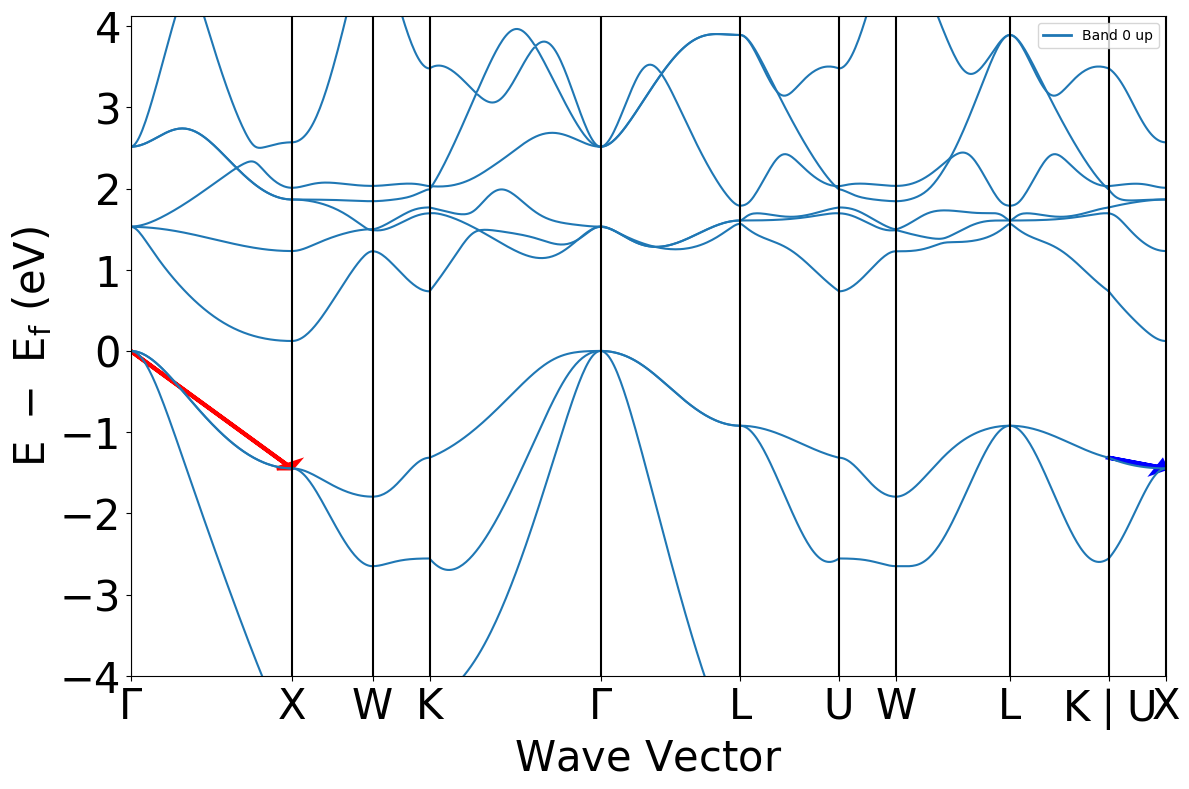

In [8]:
# Récupération des données d'énergie et de distance
energies = data.get('energy').get('1')
distances = np.unique(data.get('ticks').get('distance'))
valence_index = 17  # Index de la bande de valence

# Création d'une liste des énergies sur la bande de valence
energy_valence = []
num_steps = len(distances) - 1
energy_valence.append(energies[0][valence_index][0])

# Calcul des énergies pour chaque étape
for i in range(num_steps):
    energy_valence.append(energies[i][valence_index][-1])

# Calcul des pentes entre les points d'énergie
#On calcule toutes les pentes d'énergie 
slopes_valence = np.zeros(num_steps)
for i in range(num_steps):
    slopes_valence[i] = abs((energy_valence[i+1] - energy_valence[i]) / (distances[i+1] - distances[i]))


print("Pentes de la bande de valence :", slopes_valence)


max_slope_valence = max(slopes_valence)
min_slope_valence = min(slopes_valence)

print("Dispertion maximale", max_slope_valence)
print("Dispersion minimale", min_slope_valence)
index_max_slope_valence = np.where(slopes_valence == max_slope_valence)[0][0]
index_min_slope_valence = np.where(slopes_valence == min_slope_valence)[0][0]


print("Index de la pente maximale de la bande de valence :", index_max_slope_valence)
print("Index de la pente minimale de la bande de valence :", index_min_slope_valence)

# Plot du diagramme de bande
plot.get_plot()

# Ajout de flèches pour indiquer les pentes maximales et minimales
plt.arrow(distances[index_max_slope_valence], energy_valence[index_max_slope_valence], 
          distances[index_max_slope_valence + 1] - distances[index_max_slope_valence], 
          energy_valence[index_max_slope_valence + 1] - energy_valence[index_max_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

plt.arrow(distances[index_min_slope_valence], energy_valence[index_min_slope_valence], 
          distances[index_min_slope_valence + 1] - distances[index_min_slope_valence], 
          energy_valence[index_min_slope_valence + 1] - energy_valence[index_min_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.show()


Pour la bande de conduction minimale 

Pentes de la bande de valence : [1.45887582 2.29330504 1.4473694  0.77682342 0.0449457  1.40906044
 1.4473694  0.49659743 1.40906044 1.79585368]
Dispertion maximale 2.2933050350647806
Dispersion minimale 0.04494569609380148
Index de la pente maximale de la bande de conduction : 1
Index de la pente minimale de la bande de conduction : 4


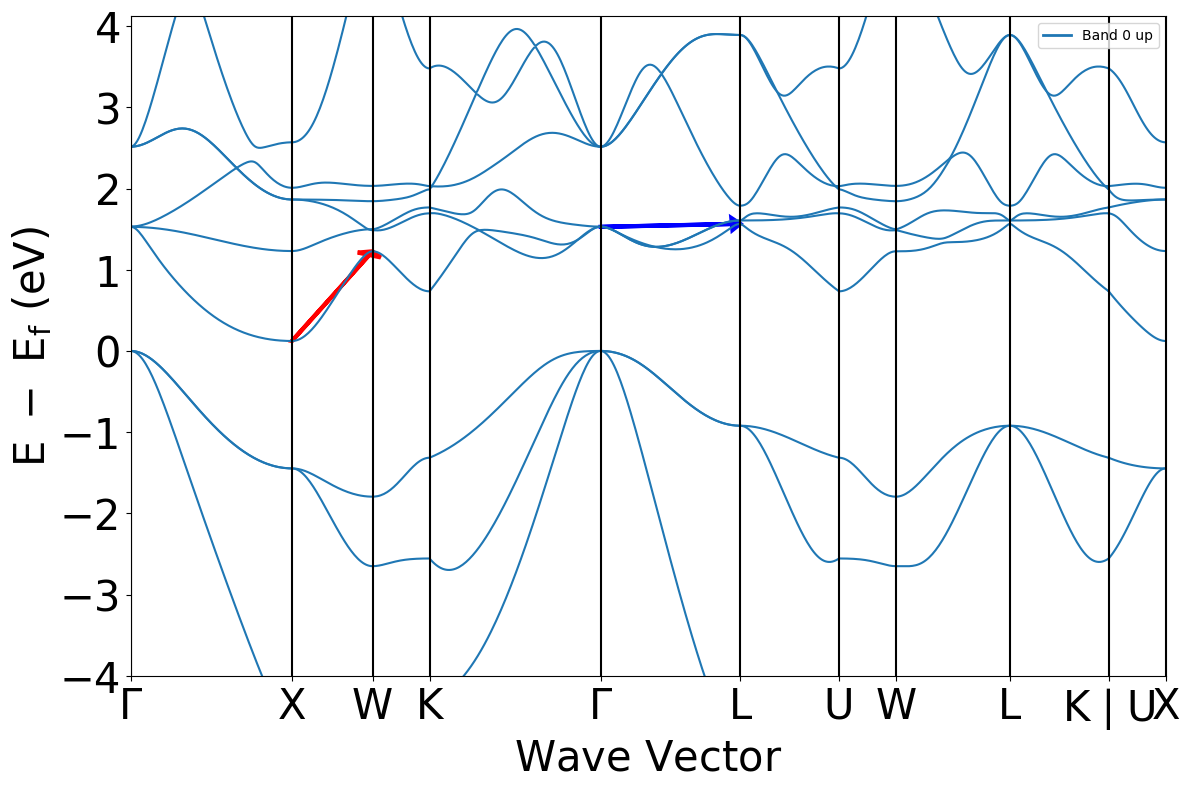

In [22]:

energies = data.get('energy').get('1')
distances = np.unique(data.get('ticks').get('distance'))
valence_index = 18  # Index de la bande de valence

# Création d'une liste des énergies sur la bande de valence
energy_valence = []
num_steps = len(distances) - 1
energy_valence.append(energies[0][valence_index][0])

# Calcul des énergies pour chaque étape
for i in range(num_steps):
    energy_valence.append(energies[i][valence_index][-1])

# Calcul des pentes entre les points d'énergie
slopes_valence = np.zeros(num_steps)
for i in range(num_steps):
    slopes_valence[i] = abs((energy_valence[i+1] - energy_valence[i]) / (distances[i+1] - distances[i]))

print("Pentes de la bande de valence :", slopes_valence)

# Calcul de la pente maximale et minimale
max_slope_valence = max(slopes_valence)
min_slope_valence = min(slopes_valence)

print("Dispertion maximale", max_slope_valence)
print("Dispersion minimale", min_slope_valence)
index_max_slope_valence = np.where(slopes_valence == max_slope_valence)[0][0]
index_min_slope_valence = np.where(slopes_valence == min_slope_valence)[0][0]


print("Index de la pente maximale de la bande de conduction :", index_max_slope_valence)
print("Index de la pente minimale de la bande de conduction :", index_min_slope_valence)


plot.get_plot()

# Ajout de flèches pour indiquer les pentes maximales et minimales
plt.arrow(distances[index_max_slope_valence], energy_valence[index_max_slope_valence], 
          distances[index_max_slope_valence + 1] - distances[index_max_slope_valence], 
          energy_valence[index_max_slope_valence + 1] - energy_valence[index_max_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

plt.arrow(distances[index_min_slope_valence], energy_valence[index_min_slope_valence], 
          distances[index_min_slope_valence + 1] - distances[index_min_slope_valence], 
          energy_valence[index_min_slope_valence + 1] - energy_valence[index_min_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.show()


Pour la bande de valence, la dispersion maximale est dans la direction `TX` et minimale dans 
la direction `UX`. Pour la bande de conduction, la dispersion maximale est dans la direction `WK` et minimale dans 
la direction `TL`

### 3) calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

La masse effective m* joue le rôle que jouait la masse m pour un électron libre se déplaçant dans un milieu de potentiel constant. Cela signifie que le mouvement forcé d'un électron dans un solide est identique à celui d'une particule de masse m* soumise à la même force.

Cette masse m* est imposée par la structure de bandes et prend en compte
l'action du réseau d'ions positifs sur l'électron. Le fait que l'on doive faire appel à un tenseur de masse effective indique que l'électron oppose une inertie plus ou moins grande à la force appliquée, suivant l'orientation de celle-ci par rapport aux axes de symétrie du cristal.

Il est intéressant de noter que la masse effective de l'électron dans le vide est équivalente à sa masse réelle.

Cette masse effective peut-être positive ou négative, supérieure
ou inférieure à la masse réelle de l’électron.
• En toute généralité, la masse effective est définie par le tenseur
d'ordre 2 des dérivées secondes de l’énergie E par rapport au
vecteur d’onde k:
$ m_{ij} = (\frac{\partial E}{\partial k_i \partial k_j})^{-1} $

Proche des minima et maxima de bande , on peut supposer une dispersion parabolique 
et donc avec une masse effective constance la relation
ε(k) peut souvent être approximée comme suit : $ \epsilon(k) = \epsilon_0 \pm \frac{\hbar}{2m*}(k_x+k_y+k_x)$

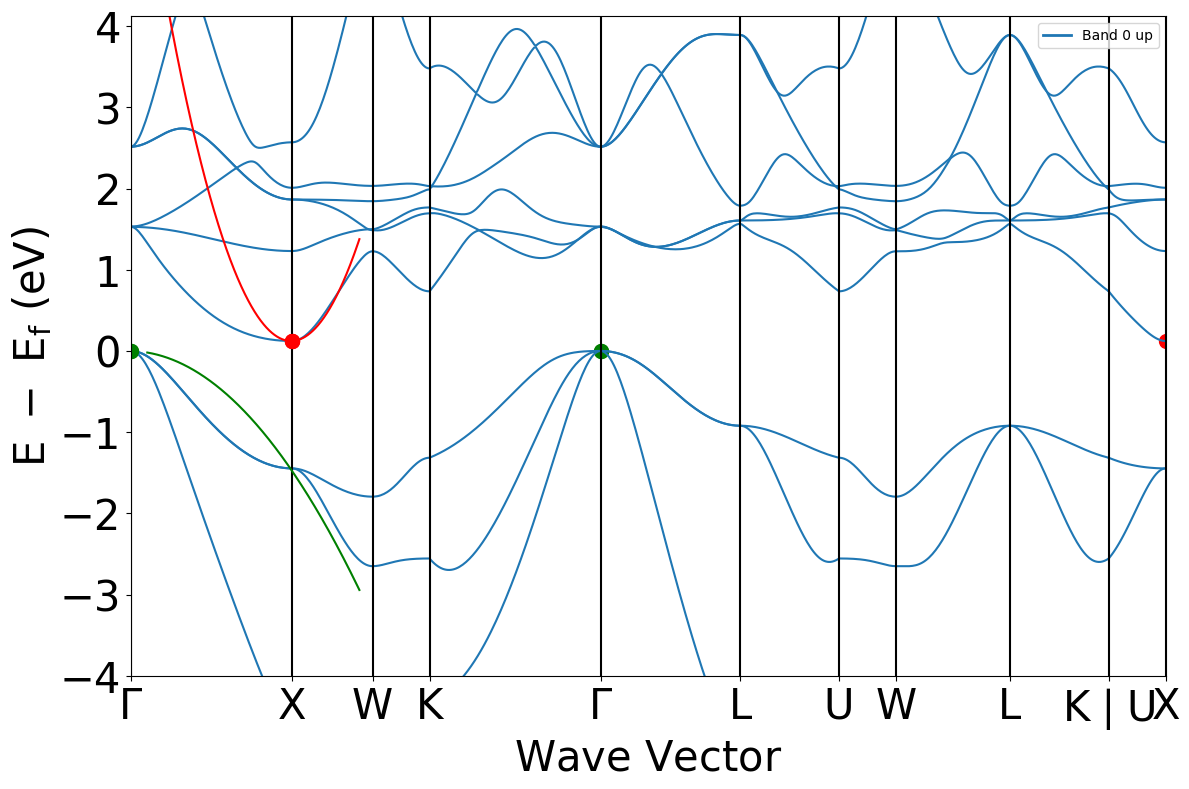

In [38]:
distances = data.get('distances')
energies = data.get('energy')

hbar = 6.582119570 * 1e-16  # Constante de Planck en eVs

vbm_coords = data.get("vbm")
cbm_coords = data.get("cbm")
  
plot.get_plot(vbm_cbm_marker=True)

# Marquage des sommets et des bases de nos bandes 
(vbm_x, vbm_y) = vbm_coords[0]
plt.plot(vbm_x, vbm_y, 'og', markersize=10)

(cbm_x, cbm_y) = cbm_coords[0]
plt.plot(cbm_x, cbm_y, 'or', markersize=10)

K = np.zeros(3)
E = np.zeros(3)

#Bande de valence 
# Points pour la régression quadratique autour du VBM
K[0], E[0] = distances[0][-2], energies['1'][0][17][-2]
K[1], E[1] = vbm_coords[0]
K[2], E[2] = distances[0][1], energies['1'][0][17][1]

f_vbm = np.polyfit(K, E, 2) 
x = np.linspace(distances[0][10], distances[1][-9], 1000)
plt.plot(x, np.polyval(f_vbm, x), 'g')

#ba,de de conduction
# Points pour la régression quadratique autour du CBM
K[0], E[0] = distances[0][-2], energies['1'][0][18][-2] 
K[1], E[1] = cbm_coords[0] 
K[2], E[2] = distances[1][2], energies['1'][1][18][2]

f_cbm = np.polyfit(K, E, 2)
x = np.linspace(distances[0][10], distances[1][-9], 1000)
plt.plot(x, np.polyval(f_cbm, x), 'r')

plt.show()


In [39]:
# Calcul de la dérivée seconde de l'énergie par rapport au vecteur d'onde au CBM et VBM
second_derivative_energy_cbm = 2 * f_cbm[0]
second_derivative_energy_vbm = 2 * f_vbm[0]

# Calcul de la masse effective au CBM et VBM
# hbar est la constante de Planck réduite convertie en unités SI (Joule-secondes)
hbar_si = hbar * 1.60219e-19  # Conversion de eVs en Joules
effective_mass_cbm = (hbar_si**2) / (second_derivative_energy_cbm * 9.10938356e-31)  # masse effective en unités de masse d'électron
effective_mass_vbm = (hbar_si**2) / (second_derivative_energy_vbm * 9.10938356e-31)


print("La masse effective au CBM est : {:.2e} m_e".format(effective_mass_cbm))
print("La masse effective au VBM est : {:.2e} m_e".format(effective_mass_vbm))



La masse effective au CBM est : 8.08e-40 m_e
La masse effective au VBM est : -3.95e-39 m_e


La masse d'un électron est de kg. Ainsi, aux deux points mentionnés précédemment, la masse effective des électrons est moindre que leur masse réelle. Cela donne l'impression que l'électron est plus léger. En conséquence, face à un potentiel donné, la réaction de l'électron équivaut à une accélération accrue.

Le signe negatif de l'electron de valence dit que l'accélération de l'électron se fait dans la même direction, mais dans le sens opposé à la force